# TED Talks Ratings EDA

This is a notebook used to create the dataset of the TED talk ratings.
For me personally the TED talks have always been inspiring and helpful in my tough times.
Here is an exploratory analysis performed on the TED talks dataset that focuses on the ratings.
The main objective is to find the source of the ratings and have a look at the varaibles it might depend on.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast
from collections import defaultdict
from pandas.plotting import parallel_coordinates
from scipy.stats import pearsonr
import re

%matplotlib inline

In [2]:
ted_data = pd.read_csv('ted_main.csv')
ted_data.columns
len(ted_data)

2550

In [3]:
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
ted_data.iloc[:10,10]

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
5    [{'id': 7, 'name': 'Funny', 'count': 1102}, {'...
6    [{'id': 3, 'name': 'Courageous', 'count': 477}...
7    [{'id': 9, 'name': 'Ingenious', 'count': 195},...
8    [{'id': 3, 'name': 'Courageous', 'count': 562}...
9    [{'id': 21, 'name': 'Unconvincing', 'count': 8...
Name: ratings, dtype: object

In [5]:
ted_data.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [6]:
# Now we need convert the duration column from seconds to minutes and the two dates columns into proper format
def transform_date(date):
    date_f= datetime.date.fromtimestamp(date)
    return date_f


ted_data["film_date"]=ted_data["film_date"].apply(transform_date)
ted_data["published_date"]=ted_data["published_date"].apply(transform_date)\

ted_data["duration"]= ted_data['duration']/60

ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-24,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-23,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-25,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-21,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
ted_data.dtypes

comments                int64
description            object
duration              float64
event                  object
film_date              object
languages               int64
main_speaker           object
name                   object
num_speaker             int64
published_date         object
ratings                object
related_talks          object
speaker_occupation     object
tags                   object
title                  object
url                    object
views                   int64
dtype: object

In [8]:
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [9]:
len(ted_data["speaker_occupation"].unique())

1459

In [10]:
#index with missing values
missing=[]
for index,row in ted_data.iterrows():
    if pd.isnull(row['speaker_occupation']):
        missing.append(index)
        print(index)

1113
1192
1220
1656
1911
1949


In [11]:
# first row with missing values
for index,row in ted_data.iterrows():
    if pd.isnull(row['speaker_occupation']):
        print(row)
        break

comments                                                            145
description           After a crisis, how can we tell if water is sa...
duration                                                        3.61667
event                                                    TEDGlobal 2011
film_date                                                    2011-07-13
languages                                                            38
main_speaker                                              Sonaar Luthra
name                               Sonaar Luthra: Meet the Water Canary
num_speaker                                                           1
published_date                                               2012-01-16
ratings               [{'id': 10, 'name': 'Inspiring', 'count': 73},...
related_talks         [{'id': 523, 'hero': 'https://pe.tedcdn.com/im...
speaker_occupation                                                  NaN
tags                  ['TED Fellows', 'design', 'global developm

In [12]:
ted_data.iloc[missing,:]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",3.616667,TEDGlobal 2011,2011-07-13,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,2012-01-16,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",18.283333,TEDxObserver,2012-03-10,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,2012-04-01,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",6.650000,TED2012,2012-02-28,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,2012-05-03,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",6.483333,TED@BCG San Francisco,2013-10-29,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,2014-01-10,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,6.100000,TEDYouth 2014,2014-11-03,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,2015-02-06,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,7.333333,TEDGlobal 2014,2014-10-19,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,2015-04-02,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [13]:
ted_data.fillna("Unknown",inplace=True)

pd.isnull(ted_data).sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [14]:
ted_data.iloc[missing,:]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",3.616667,TEDGlobal 2011,2011-07-13,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,2012-01-16,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",Unknown,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",18.283333,TEDxObserver,2012-03-10,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,2012-04-01,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",Unknown,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",6.650000,TED2012,2012-02-28,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,2012-05-03,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",Unknown,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",6.483333,TED@BCG San Francisco,2013-10-29,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,2014-01-10,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",Unknown,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,6.100000,TEDYouth 2014,2014-11-03,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,2015-02-06,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",Unknown,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,7.333333,TEDGlobal 2014,2014-10-19,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,2015-04-02,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",Unknown,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [15]:
ted_data.describe()

,comments,duration,languages,num_speaker,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,191.562353,13.775170,27.326275,1.028235,1.698297e+06
std,282.315223,6.233486,9.563452,0.207705,2.498479e+06
min,2.000000,2.250000,0.000000,1.000000,5.044300e+04
25%,63.000000,9.616667,23.000000,1.000000,7.557928e+05
50%,118.000000,14.133333,28.000000,1.000000,1.124524e+06
75%,221.750000,17.445833,33.000000,1.000000,1.700760e+06
max,6404.000000,87.600000,72.000000,5.000000,4.722711e+07


In [16]:
# Now we see that the language column has minimum as 0 which means they aren't given any values but we assign them to 1
ted_data["languages"] = ted_data["languages"].replace(0,1)

In [17]:
ted_data["languages"].describe()

count    2550.000000
mean       27.360000
std         9.468279
min         1.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

# Creating Talk_ID for different Ted Talks

In [18]:
# Creating a columns with ID of each row
ted_data['Talk_ID'] = range(1, len(ted_data)+1)

# Ratings data from the rating columns and their values used

In [19]:
rating_names = set()
for index, row in ted_data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item["name"])
    
print (rating_names)

{'Ingenious', 'Persuasive', 'OK', 'Beautiful', 'Informative', 'Unconvincing', 'Funny', 'Jaw-dropping', 'Inspiring', 'Longwinded', 'Fascinating', 'Obnoxious', 'Courageous', 'Confusing'}


In [20]:
rating_data=defaultdict(list)
for index, row in ted_data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data["Talk_ID"].append(row["Talk_ID"])
    names=set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])
        
rating_data = pd.DataFrame(rating_data)

rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,2,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,3,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,4,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,5,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [21]:
rating_data['total'] = rating_data.sum(axis = 1)
rating_data = rating_data.sort_values('total', ascending=False)
rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93851
201,202,966,9437,1228,7842,398,289,5430,14447,550,1704,10464,636,356,16918,70867
1346,1347,938,3232,1428,6305,338,197,9787,11111,335,6217,3586,1129,155,21210,67315
837,838,5225,7942,1094,8280,283,155,4561,4638,233,3510,2100,500,113,21444,60916
677,678,390,1640,3413,1161,390,112,6600,7440,930,8845,2659,1341,294,21564,57457


In [22]:
# Now we convert the numbers present in the columns to the percentage

def column_percentage(column):
    return (column/rating_data['total'])*100

rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')].apply(column_percentage)

rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851
201,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867
1346,1347,1.393449,4.801307,2.121370,9.366412,0.502117,0.292654,14.539107,16.505979,0.497660,9.235683,5.327193,1.677189,0.230261,31.508579,67315
837,838,8.577385,13.037626,1.795916,13.592488,0.464574,0.254449,7.487360,7.613763,0.382494,5.762033,3.447370,0.820802,0.185501,35.202574,60916
677,678,0.678768,2.854308,5.940094,2.020642,0.678768,0.194928,11.486851,12.948814,1.618602,15.394121,4.627809,2.333919,0.511687,37.530675,57457


# Tags Data From the Tags Column

In [23]:
# Now we seperate the tags for each of the Talk_ID and make a dataframe

tags_data = defaultdict(list)
for index, row in ted_data.iterrows():
    themes = ast.literal_eval(row['tags'])
    for item in themes:
        tags_data['Talk_ID'].append(row['Talk_ID'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

print ("Number of Unique Tags:",len(tags_data['tags'].unique()))
print ("Total Number of Tags Used:",len(tags_data))
tags_data.head(20)

Number of Unique Tags: 416
Total Number of Tags Used: 19154


,Talk_ID,tags
0,1,children
1,1,creativity
2,1,culture
3,1,dance
4,1,education
5,1,parenting
6,1,teaching
7,2,alternative energy
8,2,cars
9,2,climate change


# Speakers Occupation Data

In [24]:
# We start by looking at the data in the speaker occupation column and then decide how to proceed
ted_data["speaker_occupation"].head(50)

0                                 Author/educator
1                                Climate advocate
2                            Technology columnist
3              Activist for environmental justice
4            Global health expert; data visionary
5     Life coach; expert in leadership psychology
6                     Actor, comedian, playwright
7                                       Architect
8                Philosopher, cognitive scientist
9                                  Pastor, author
10          Co-founder, Architecture for Humanity
11                                      Filmmaker
12                 Epidemiologist, philanthropist
13              Human-computer interface designer
14                                 Tech visionary
15                                      Violinist
16                              Pianist, composer
17                             inventor, engineer
18                            Industrial designer
19                           Founder of Wikipedia


In [25]:
# Here we can see there are multipe occupation that one person has and it is depicted with [; / ,] which creates problems
ted_data["speaker_occupation"].tail(50)
# We get the same result when we look at the tail

2500                         Writer, peace advocate
2501                                     Art editor
2502                             Computer scientist
2503                            AI product designer
2504                       Cognitive neuroscientist
2505                               Author, activist
2506                                 Science writer
2507                                Movement artist
2508        Microbiologist, inventor and strategist
2509                           Artist and filmmaker
2510                                 Tech podcaster
2511                      Clinical professor of law
2512                         Musician, entrepreneur
2513                                 Urban designer
2514                           Mayor of Albuquerque
2515                     Developmental psychologist
2516                              Student, musician
2517                  Mathematician, data scientist
2518                 Computational social scientist
2519        

In [26]:
# So here we want to have a look at the data that is presented in this column and have a look at all the problems keyowrds 
# and then work on them later
problemcharacters= re.compile(r'[=\+/&<>;\"\-\?%#$@\,\t\r\n]| and ')

problems_occupations= defaultdict(list)
for index, row in ted_data.iterrows():
    occupation=row['speaker_occupation']
    char=problemcharacters.search(occupation)
    
    if char:
        chars= char.group()
        problems_occupations[chars].append(occupation)

problems_occupations.keys()

dict_keys(['/', ';', ',', '-', ' and ', '+'])

In [27]:
problems_occupations[" and "]

['Neuroscience and cancer researcher',
 'Investor and advocate for moral leadership',
 'Marketer and author',
 'Investor and advocate for moral leadership',
 'Educator and computing pioneer',
 'Botanist and activist',
 'Engineer and origamist',
 'Musician and inventor',
 'Blogger and activist',
 'Political scientist and journalist',
 'Technologist and futurist',
 'Athlete and actor',
 'Photographer and explorer',
 'Designer and theorist',
 'Cognitive scientist and design critic',
 'Athlete and actor',
 'Business owner and activist',
 'Investor and advocate for moral leadership',
 'Physicist and military theorist',
 'Food and agriculture expert',
 'Marketer and author',
 'Technologist and visionary',
 'Speaker and author',
 'Sculptor of light and space',
 'Chief Economist and Senior Vice President, World Bank',
 'Investor and advocate for moral leadership',
 'Conductor and leadership expert',
 'Politician and writer',
 'Health and human services expert',
 'Athlete and actor',
 'Cardiolo

In [28]:
problems_occupations["/"]

['Author/educator',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Singer/songwriter',
 'Author/educator',
 'HIV/AIDS fighter',
 'Author/educator',
 '9/11 mothers',
 'Author/illustrator',
 'Author/educator',
 'Author/illustrator',
 'Director/choreographer, dancer']

In [29]:
# Now we can see there are 8 keys that are used to seperate the occupation of speakers that consists of more than 1 role
mult_occupation = re.compile(r'\/|\,|\;|\+| and ')
end_issue = re.compile(r' \.\.\.')
occupation_data = defaultdict(list)
ignore_cases_list = ['HIV/AIDS fighter','9/11 mothers']

for index, row in ted_data.iterrows():
    occupation = row['speaker_occupation']
    problem_found = False
    if mult_occupation.search(occupation):
        problem_found = True
    if problem_found & (occupation not in ignore_cases_list):
        occupation = re.split('\/|\,|\;|\+| and ', occupation)
        for item in occupation:
            occupation_data['Talk_ID'].append(row['Talk_ID'])
            if end_issue.search(item):
                item = item.strip(' ...')
            occupation_data['speaker_occupation'].append(item.strip().lower())
    #All strings were converted to lowercase in order to avoid the same word in different formats.
    else:
        occupation_data['Talk_ID'].append(row['Talk_ID'])
        occupation_data['speaker_occupation'].append(occupation.lower())

occupation_data = pd.DataFrame(occupation_data)

occupation_data.head(10)

,Talk_ID,speaker_occupation
0,1,author
1,1,educator
2,2,climate advocate
3,3,technology columnist
4,4,activist for environmental justice
5,5,global health expert
6,5,data visionary
7,6,life coach
8,6,expert in leadership psychology
9,7,actor


In [30]:
print (occupation_data['speaker_occupation'].value_counts().head())
print ((len(occupation_data)))
print (len(occupation_data['speaker_occupation'].unique()))

writer          93
author          85
activist        66
artist          65
entrepreneur    59
Name: speaker_occupation, dtype: int64
3203
1293


In [31]:
occupation_data['speaker_occupation'].unique()[:20]

array(['author', 'educator', 'climate advocate', 'technology columnist',
       'activist for environmental justice', 'global health expert',
       'data visionary', 'life coach', 'expert in leadership psychology',
       'actor', 'comedian', 'playwright', 'architect', 'philosopher',
       'cognitive scientist', 'pastor', 'co-founder',
       'architecture for humanity', 'filmmaker', 'epidemiologist'],
      dtype=object)

In [32]:
# The top 10 occupation of the speakers presenting at the TED Talks
occupation_data['speaker_occupation'].value_counts().head(10)

writer          93
author          85
activist        66
artist          65
entrepreneur    59
designer        58
journalist      50
inventor        49
educator        49
architect       37
Name: speaker_occupation, dtype: int64

In [33]:
# The total number of unique occupations are
print ("Total Unique occupations are:",len(occupation_data['speaker_occupation'].unique()))

Total Unique occupations are: 1293


In [34]:
# Lets create a dataframe that contains only basic information
ted_basic_info = ted_data[['Talk_ID', 'title', 'duration','comments','views','languages']]

### There are four dataframes that we created in the process they are 
#### 1) rating_data 
#### 2) tags_data 
#### 3) occupation_data
#### 4) ted_basic_info

#### 

# Analysing the data

In [35]:
# The ratings that are present in the dataset
rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851
201,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867
1346,1347,1.393449,4.801307,2.121370,9.366412,0.502117,0.292654,14.539107,16.505979,0.497660,9.235683,5.327193,1.677189,0.230261,31.508579,67315
837,838,8.577385,13.037626,1.795916,13.592488,0.464574,0.254449,7.487360,7.613763,0.382494,5.762033,3.447370,0.820802,0.185501,35.202574,60916
677,678,0.678768,2.854308,5.940094,2.020642,0.678768,0.194928,11.486851,12.948814,1.618602,15.394121,4.627809,2.333919,0.511687,37.530675,57457


In [36]:
count_talks=defaultdict(list)
for rating in rating_data.columns:
    if (rating!="Talk_ID") & (rating!="total"):
        count_talks["rating"].append(rating)
        count_talks["counting"].append(rating_data[rating_data[rating]>0][rating].count())

In [37]:
count_talks

defaultdict(list,
            {'rating': ['Funny',
              'Beautiful',
              'Ingenious',
              'Courageous',
              'Longwinded',
              'Confusing',
              'Informative',
              'Fascinating',
              'Unconvincing',
              'Persuasive',
              'Jaw-dropping',
              'OK',
              'Obnoxious',
              'Inspiring'],
             'counting': [2477,
              2543,
              2546,
              2541,
              2485,
              2441,
              2537,
              2549,
              2507,
              2543,
              2544,
              2541,
              2441,
              2550]})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

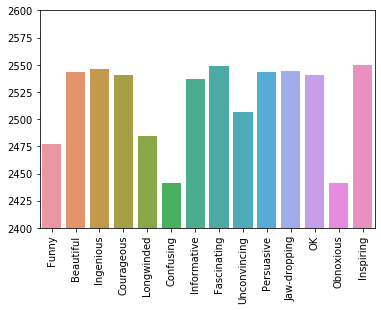

In [38]:
sns.barplot(x="rating", y="counting", data=count_talks)
plt.ylim(2400, 2600)
plt.xticks(rotation='vertical')

In [39]:
# Now we can easily see that the total number of ted talks in the data is 2550 so we can say ratings like Inspiring,
# Ingenious and Fascinating are used in almost all of them and positive ratings are used more commonly as compared
# to the negative ones. This tells us about the diversity in opinion of various people present at a talk.

# To keep the things in persepective we just add the main rating in the for each of the talk in the main dataframe so that we can get a rough idea of the rating that is most commonly used for that talk

In [40]:
ratings=rating_data.columns[(rating_data.keys()!="Talk_ID") & (rating_data.keys()!="total") & (rating_data.keys()!='main_rating')]

In [41]:
ratings

Index(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded',
       'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'],
      dtype='object')

In [42]:
rating_values = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] 
rating_data['main_rating'] = ratings[rating_values.apply(np.argmax, axis = 1)]
rating_data['main_rating'].head()

0       Inspiring
201     Inspiring
1346    Inspiring
837     Inspiring
677     Inspiring
Name: main_rating, dtype: object

In [43]:
label_order= rating_data['main_rating'].value_counts().sort_values(ascending = False).index
label_order

Index(['Inspiring', 'Informative', 'Fascinating', 'Funny', 'Beautiful',
       'Ingenious', 'Courageous', 'Persuasive', 'Jaw-dropping', 'Unconvincing',
       'Longwinded', 'OK', 'Obnoxious', 'Confusing'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

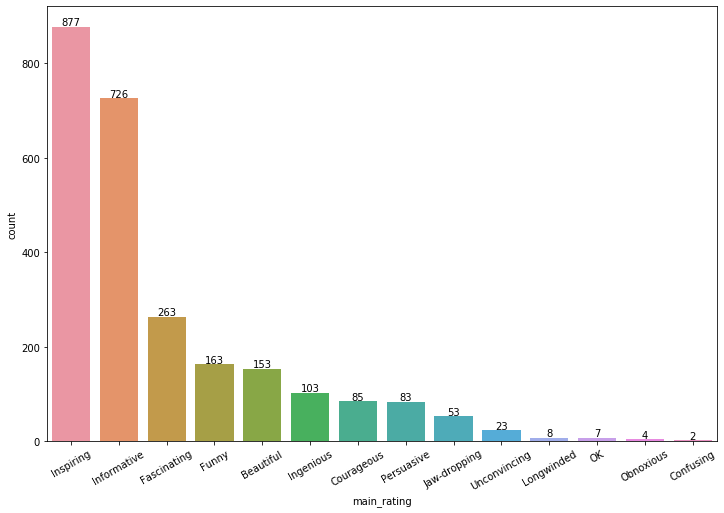

In [44]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x = 'main_rating', data = rating_data, order = label_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:d}'.format(height),
            ha="center") 
plt.xticks(rotation=30)

Text(0, 0.5, 'Percentage of Votes')

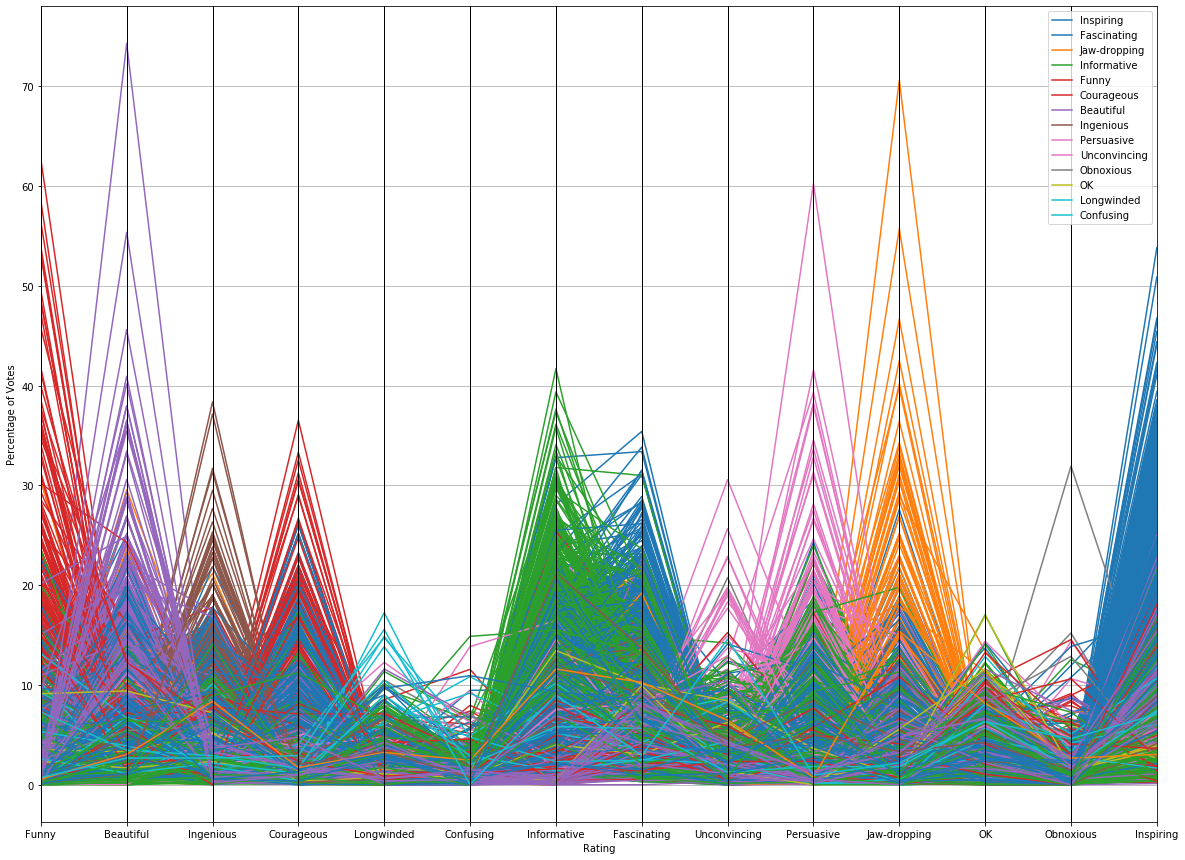

In [45]:
# The parallel coordinates chart helps us have a look at all the 2550 ted talks and see their ratings in percentage
rating_values_updated = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')]
plt.figure(figsize=(20,15))
parallel_coordinates(rating_values_updated, 'main_rating', colormap=plt.get_cmap("tab10"))
plt.xlabel("Rating")
plt.ylabel("Percentage of Votes")

### Here we can see that the negative ratings like obnoxious and confusing have a very small percentage as compared to the positive rating like inspiring and informative we can also see spike in the talks having funny, jaw-dropping and persuasive rating this means that a lot of people agree to these classification.

# Now lets have a look at the number of votes as compared to the comments and views

In [46]:
print (rating_data['total'].head(1))
print (rating_data['total'].tail(1))

0    93851
Name: total, dtype: int64
113    411
Name: total, dtype: int64


In [47]:
# Lets join the rating_data with the basic_info dataframe

rating_and_basic = rating_data.merge(ted_basic_info, how= "left", on=["Talk_ID"])

In [48]:
rating_and_basic.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,...,OK,Obnoxious,Inspiring,total,main_rating,title,duration,comments,views,languages
0,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,...,1.250919,0.222693,26.556989,93851,Inspiring,Do schools kill creativity?,19.400000,4553,47227110,60
1,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,...,0.897456,0.502349,23.872889,70867,Inspiring,My stroke of insight,18.316667,2877,21190883,49
2,1347,1.393449,4.801307,2.121370,9.366412,0.502117,0.292654,14.539107,16.505979,0.497660,...,1.677189,0.230261,31.508579,67315,Inspiring,Your body language may shape who you are,21.033333,2290,43155405,51
3,838,8.577385,13.037626,1.795916,13.592488,0.464574,0.254449,7.487360,7.613763,0.382494,...,0.820802,0.185501,35.202574,60916,Inspiring,The power of vulnerability,20.316667,1927,31168150,52
4,678,0.678768,2.854308,5.940094,2.020642,0.678768,0.194928,11.486851,12.948814,1.618602,...,2.333919,0.511687,37.530675,57457,Inspiring,How great leaders inspire action,18.066667,1930,34309432,45


Text(0, 0.5, 'Total Votes')

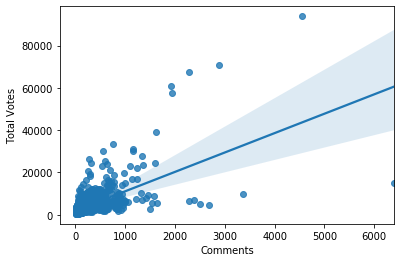

In [49]:
# Comments vs the Total Votes
sns.regplot(x="comments", y="total", data=rating_and_basic)
plt.xlabel("Comments")
plt.ylabel("Total Votes")

Text(0, 0.5, 'Total Votes')

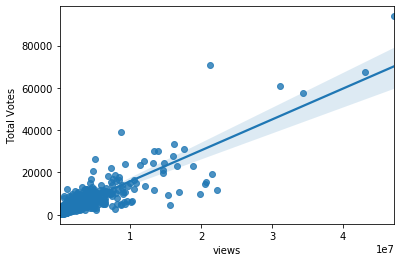

In [50]:
# Views vs the Total Votes
sns.regplot(x="views", y="total", data=rating_and_basic)
plt.xlabel("views")
plt.ylabel("Total Votes")

Text(0, 0.5, 'Total Votes')

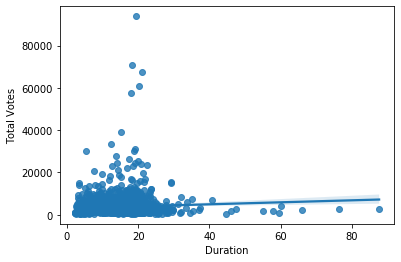

In [51]:
sns.regplot(x="duration", y="total", data=rating_and_basic)
plt.xlabel("Duration")
plt.ylabel("Total Votes")

Text(0, 0.5, 'Total Votes')

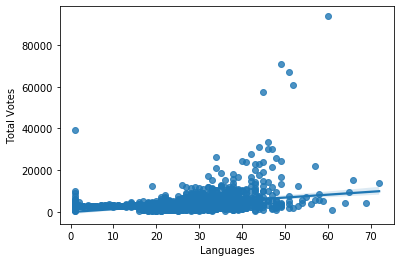

In [52]:
sns.regplot(x="languages", y="total", data=rating_and_basic)
plt.xlabel("Languages")
plt.ylabel("Total Votes")
# One thing to notice here is that increase in the number of languages in which the talk is availabe doesn't necessarily
# mean that you will more views especially after 50 there are some expections though.

Text(0, 0.5, 'Comments')

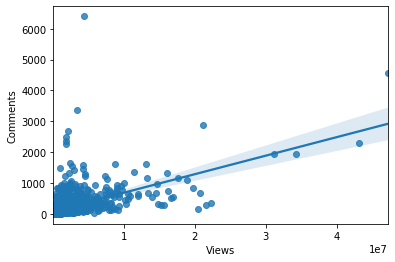

In [53]:
sns.regplot(x="views", y="comments", data=rating_and_basic)
plt.xlabel("Views")
plt.ylabel("Comments")

Text(0, 0.5, 'Languages')

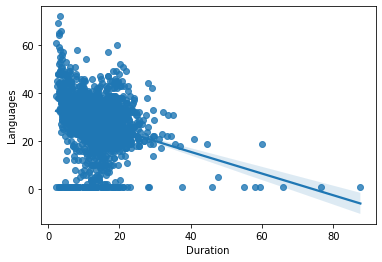

In [54]:
sns.regplot(x="duration", y="languages", data=rating_and_basic)
plt.xlabel("Duration")
plt.ylabel("Languages")

In [55]:
ted_basic_info.sort_values('views', ascending = False).head(10)

,Talk_ID,title,duration,comments,views,languages
0,1,Do schools kill creativity?,19.400000,4553,47227110,60
1346,1347,Your body language may shape who you are,21.033333,2290,43155405,51
677,678,How great leaders inspire action,18.066667,1930,34309432,45
837,838,The power of vulnerability,20.316667,1927,31168150,52
452,453,10 things you didn't know about orgasm,16.716667,354,22270883,37
1776,1777,How to speak so that people want to listen,9.966667,297,21594632,45
201,202,My stroke of insight,18.316667,2877,21190883,49
5,6,Why we do what we do,21.750000,672,20685401,36
2114,2115,This is what happens when you reply to spam email,9.800000,150,20475972,43
1416,1417,"Looks aren't everything. Believe me, I'm a model.",9.616667,846,19787465,43


###### 

In [56]:
ted_basic_info.sort_values('comments', ascending = False).head()

,Talk_ID,title,duration,comments,views,languages
96,97,Militant atheism,29.166667,6404,4374792,42
0,1,Do schools kill creativity?,19.400000,4553,47227110,60
644,645,Science can answer moral questions,23.100000,3356,3433437,39
201,202,My stroke of insight,18.316667,2877,21190883,49
1787,1788,How do you explain consciousness?,18.616667,2673,2162764,33


In [57]:
# To find correlation between the main rating and the other variables
ordered_by_median = rating_and_basic.groupby('main_rating')['views'].median().sort_values(ascending = False).index

In [58]:
ordered_by_median

Index(['Jaw-dropping', 'Funny', 'Fascinating', 'Courageous', 'Inspiring',
       'Informative', 'Unconvincing', 'Persuasive', 'Beautiful', 'Ingenious',
       'OK', 'Obnoxious', 'Confusing', 'Longwinded'],
      dtype='object', name='main_rating')

Text(0.5, 1.0, 'Main Ratings vs Views')

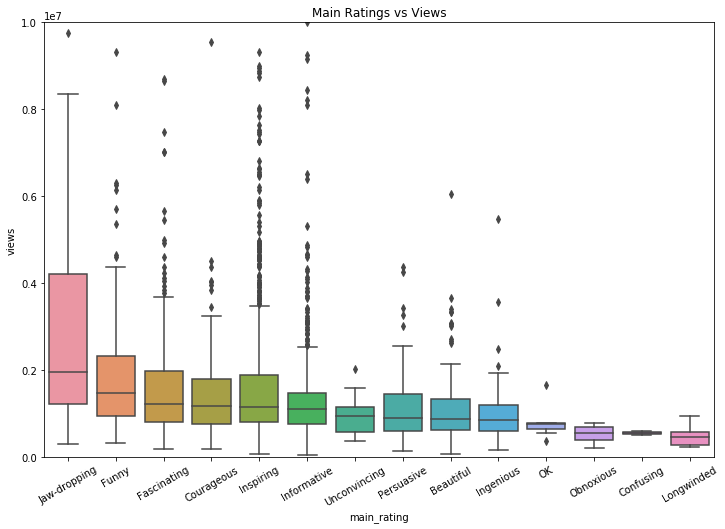

In [59]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="views", data=rating_and_basic, order = ordered_by_median)
plt.xticks(rotation=30)
plt.ylim((0,10000000))
plt.title("Main Ratings vs Views")

### It is interesting to notice the fact that the jaw-dropping and funnny have the more views than the others and most of the negative ones are at the bottom.

Text(0.5, 1.0, 'Main Ratings vs Comments')

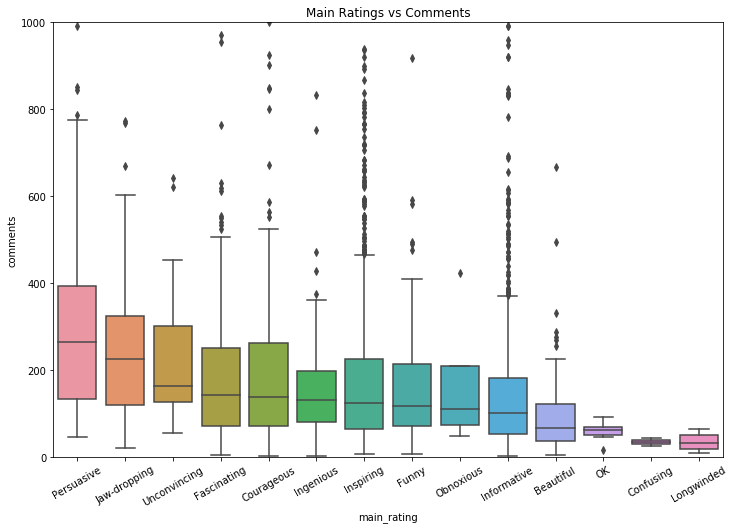

In [60]:
ordered_by_median_com = rating_and_basic.groupby('main_rating')['comments'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="comments", data=rating_and_basic, order = ordered_by_median_com)
plt.xticks(rotation=30)
plt.ylim((0,1000))
plt.title("Main Ratings vs Comments")

### It can be seen that the persuasive talks are the ones that have the most number of comments.

Text(0.5, 1.0, 'Main Ratings vs Languages')

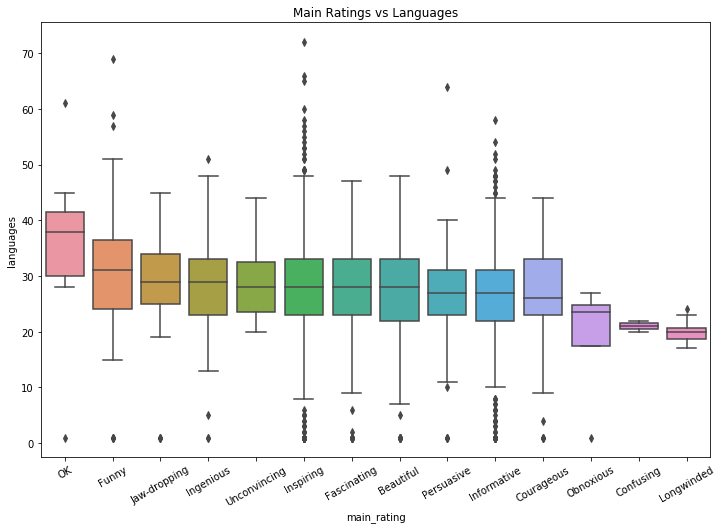

In [61]:
ordered_by_median_lan = rating_and_basic.groupby('main_rating')['languages'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="languages", data=rating_and_basic, order = ordered_by_median_lan)
plt.xticks(rotation=30)
plt.title("Main Ratings vs Languages")

### The OK Ratings are the ones that are most translated and the confusing and longwinded are the least translated.

Text(0.5, 1.0, 'Main Ratings vs Duration')

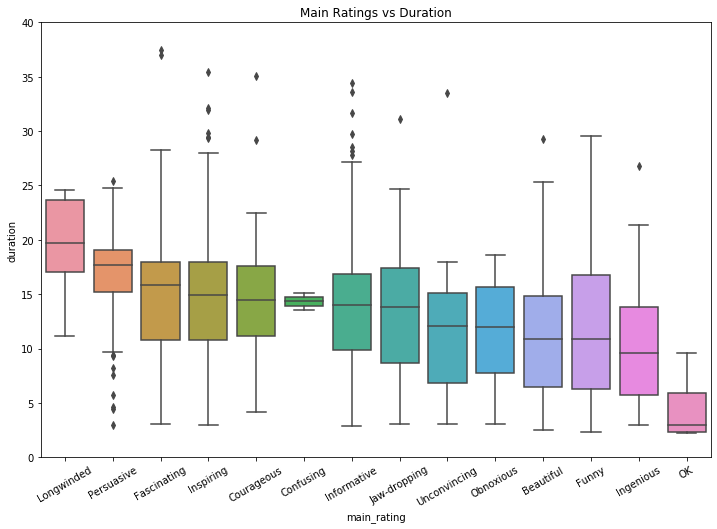

In [62]:
ordered_by_median_dur = rating_and_basic.groupby('main_rating')['duration'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="duration", data=rating_and_basic, order = ordered_by_median_dur)
plt.xticks(rotation=30)
plt.ylim((0,40))
plt.title("Main Ratings vs Duration")

### The longwinded are the talks that are the longest and the OK ones are of small duration and that can be one explanation as to why the OK ones are translated the most and the Longwinded are translated the least.

In [63]:
# Lets create a heatmap to see the correlation between the variables for that we first need to drop the Talk_ID and title

In [64]:
to_remove = ['Talk_ID', 'title']
corr = rating_and_basic.drop(to_remove, axis = 1).corr() 

Text(0.5, 1, 'Heatmap of Correlation between Features')

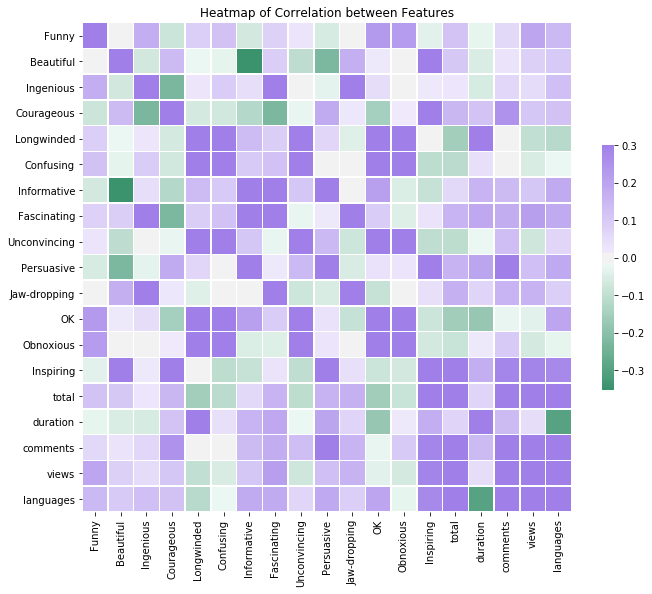

In [65]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features')

Text(0.5, 1, 'Heatmap of Correlation between Features')

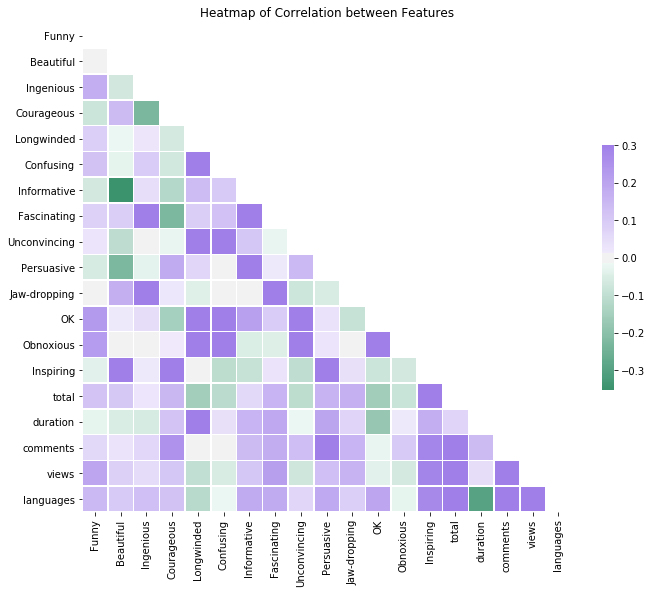

In [66]:
# Lets create a better version using the mask function to just see a half triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features')

### 1) Now we can see that duration and language have negative correlation as in the previous graph.
### 2) All the negatives words like confusing, unconvincing, obnoxious,ok are usually together.
### 3) From our box plot and heatmap we can see that Persuasive and comments are related.
### 4) Also Longwinded and duration are correlated.

Text(0.5, 0, 'Persuasive percentage')

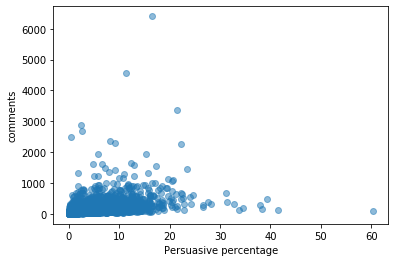

In [67]:
plt.scatter(rating_and_basic['Persuasive'], rating_and_basic['comments'], alpha = 0.5)
plt.ylabel("comments")
plt.xlabel("Persuasive percentage")

Text(0.5, 0, 'Inspiring percentage')

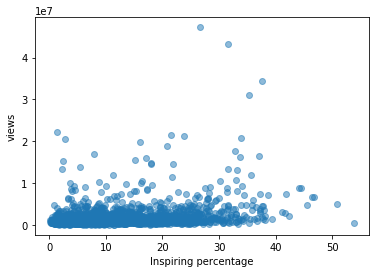

In [68]:
plt.scatter(rating_and_basic['Inspiring'], rating_and_basic['views'], alpha = 0.5)
plt.ylabel("views")
plt.xlabel("Inspiring percentage")

In [69]:
pearsonr(rating_and_basic['Inspiring'], rating_and_basic['views'])

(0.2895446879753314, 1.9455824225154858e-50)

In [70]:
pearsonr(rating_and_basic['Persuasive'], rating_and_basic['comments'])

(0.34734502084582647, 3.309788630130178e-73)

In [71]:
# There is some correlation in both the cases but the correlation is not strong enough.

## Looking for relation between the speaker occupation and main rating and also the tags and the main rating

In [72]:
tags_rating = rating_data.merge(tags_data, how = 'left', on = ['Talk_ID'])
occupation_rating = rating_data.merge(occupation_data, how = 'left', on = ['Talk_ID'])

In [73]:
occupation_rating.head(10)

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total,main_rating,speaker_occupation
0,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,author
1,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,educator
2,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867,Inspiring,neuroanatomist
3,1347,1.393449,4.801307,2.121370,9.366412,0.502117,0.292654,14.539107,16.505979,0.497660,9.235683,5.327193,1.677189,0.230261,31.508579,67315,Inspiring,social psychologist
4,838,8.577385,13.037626,1.795916,13.592488,0.464574,0.254449,7.487360,7.613763,0.382494,5.762033,3.447370,0.820802,0.185501,35.202574,60916,Inspiring,vulnerability researcher
5,678,0.678768,2.854308,5.940094,2.020642,0.678768,0.194928,11.486851,12.948814,1.618602,15.394121,4.627809,2.333919,0.511687,37.530675,57457,Inspiring,leadership expert
6,1031,1.998010,9.834392,3.054429,10.592258,0.403174,0.352140,3.490775,8.584041,0.512899,6.649825,5.233611,2.202149,0.341933,44.119523,39189,Inspiring,visionary
7,1130,21.960372,3.023116,3.488442,1.413990,0.234164,0.183128,11.666166,7.592315,0.246172,10.285200,2.050435,0.618433,0.183128,33.662564,33310,Inspiring,psychologist
8,1164,3.362072,7.906798,2.660171,12.640620,0.522419,0.266017,11.611807,10.118265,0.471139,10.784911,1.416621,1.503157,0.256402,32.748950,31201,Inspiring,quiet revolutionary
9,531,2.352669,18.501287,2.454959,9.295189,0.359665,0.280473,8.866231,9.842935,0.339867,9.905629,3.128093,1.098792,0.257375,31.564707,30306,Inspiring,novelist


In [74]:
tags_rating.head(10)

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total,main_rating,tags
0,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,children
1,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,creativity
2,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,culture
3,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,dance
4,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,education
5,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,parenting
6,1,20.932116,4.872617,6.470895,3.466132,0.412356,0.257856,7.827301,11.274254,0.319656,11.405313,4.729838,1.250919,0.222693,26.556989,93851,Inspiring,teaching
7,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867,Inspiring,biology
8,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867,Inspiring,brain
9,202,1.363117,13.316494,1.732823,11.065799,0.561615,0.407806,7.662241,20.386075,0.776102,2.404504,14.765688,0.897456,0.502349,23.872889,70867,Inspiring,consciousness


In [75]:
#Function that finds the main tags or speakers occupation
def find_common_var(rating, var):
    if var == 'tags':
        count_tags = tags_rating[tags_rating['main_rating'] == rating]['tags'].value_counts()
    else:
        count_tags = occupation_rating[occupation_rating['main_rating'] ==\
                                       rating]['speaker_occupation'].value_counts()
    return count_tags

In [76]:
#Function to find the top ratrings in the tags/ occupation

def tags_or_occupation(search):
    #var should be tags or speakers_occupation
    #Find the five main tags/occupation for each main rating and save in a set
    main_var_set = set()
    for name in rating_names:
        main_var_set.update(find_common_var(name, search).head().index)

    #Create a dataframe with the tags/occupation and values for each main rating
    rating_main_var = defaultdict(list)
    for name in rating_names:
        current_rating_table = find_common_var(name, search).head()
        main_var = current_rating_table.index
        rating_main_var['rating'].append(name)
        for var in main_var_set:
            if var not in main_var:
                rating_main_var[var].append(0)
            else:
                rating_main_var[var].append(current_rating_table[var])
    return rating_main_var



In [77]:
# For the Ratings and the tags
rating_main_tags = tags_or_occupation('tags')
rating_main_tags = pd.DataFrame(rating_main_tags)  

In [78]:
rating_main_tags = rating_main_tags.set_index('rating')

In [79]:
rating_main_tags

,religion,health,design,art,music,business,film,science,live music,architecture,...,social change,invention,entertainment,comedy,medicine,TEDx,technology,performance,psychology,product design
rating,,,,,,,,,,,,,,,,,,,,,
Ingenious,0,0,45,0,0,0,0,27,0,0,...,0,28,0,0,0,24,72,0,0,0
Persuasive,0,0,0,0,0,24,0,18,0,0,...,0,0,0,0,0,0,22,0,0,0
OK,0,0,2,2,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beautiful,0,0,0,45,61,0,0,0,47,0,...,0,0,59,0,0,0,0,54,0,0
Informative,0,0,0,0,0,126,0,226,0,0,...,0,0,0,0,0,151,249,0,0,0
Unconvincing,3,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
Funny,0,0,31,0,0,0,0,0,0,0,...,0,0,70,41,0,0,0,0,0,0
Jaw-dropping,0,0,16,0,0,0,0,10,0,0,...,0,0,22,0,0,0,29,14,0,0
Inspiring,0,0,0,0,0,142,0,0,0,0,...,0,0,0,0,0,156,165,0,0,0


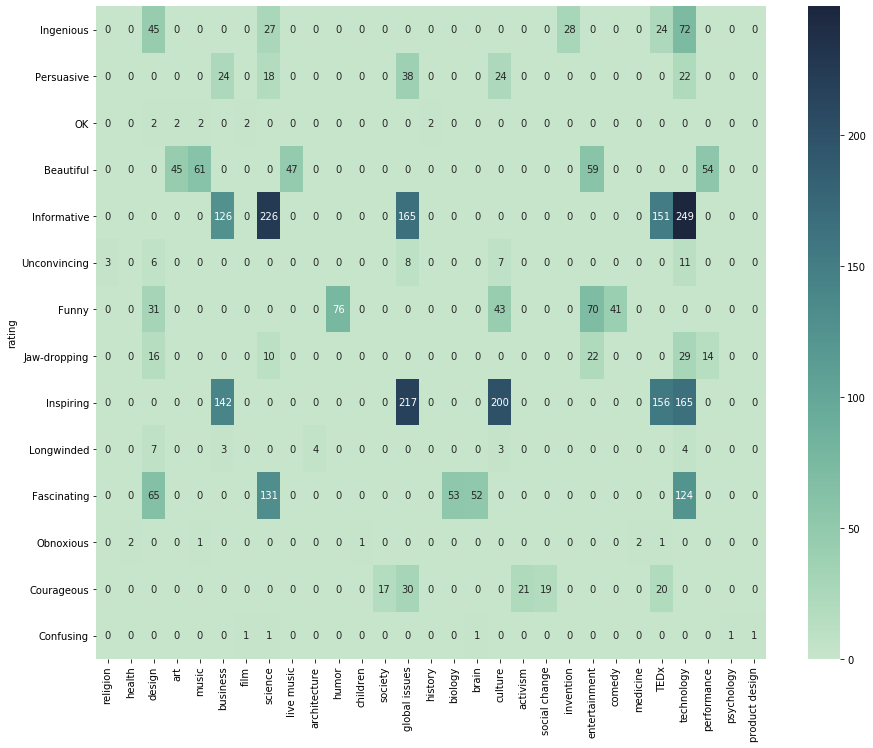

In [80]:
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
ax = sns.heatmap(rating_main_tags, annot = True, fmt = "d", cmap = cmap)

In [81]:
tags_data['tags'].value_counts().head(10)

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: tags, dtype: int64

## Some of the ratings associated to a different tag and not a common one, some of the examples include:
### Beautiful is associated with the tags art, performance and music.
### Courageous with activism, social change and society.
### Funny with comedy, humor and entertainment.

In [82]:
# For Ratings and the Speaker Occupation
rating_main_occup = tags_or_occupation('speakers_occupation')
rating_main_occup = pd.DataFrame(rating_main_occup)  
rating_main_occup = rating_main_occup.set_index('rating')

In [83]:
rating_main_occup

,philosopher,biologist,physicist,legal activist,comedian,educator,photographer,journalist,graphic designer,filmmaker,...,film executive,neuroscientist,origamist,genetics pioneer,ai pioneer,designer,inventor,poet,singer,author
rating,,,,,,,,,,,,,,,,,,,,,
Ingenious,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,13,0,0,0
Persuasive,5,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,4
OK,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
Beautiful,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,11,8,0
Informative,0,0,0,0,0,0,0,19,0,0,...,0,16,0,0,0,0,0,0,0,18
Unconvincing,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Funny,0,0,0,0,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,8
Jaw-dropping,0,2,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,0
Inspiring,0,0,0,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51


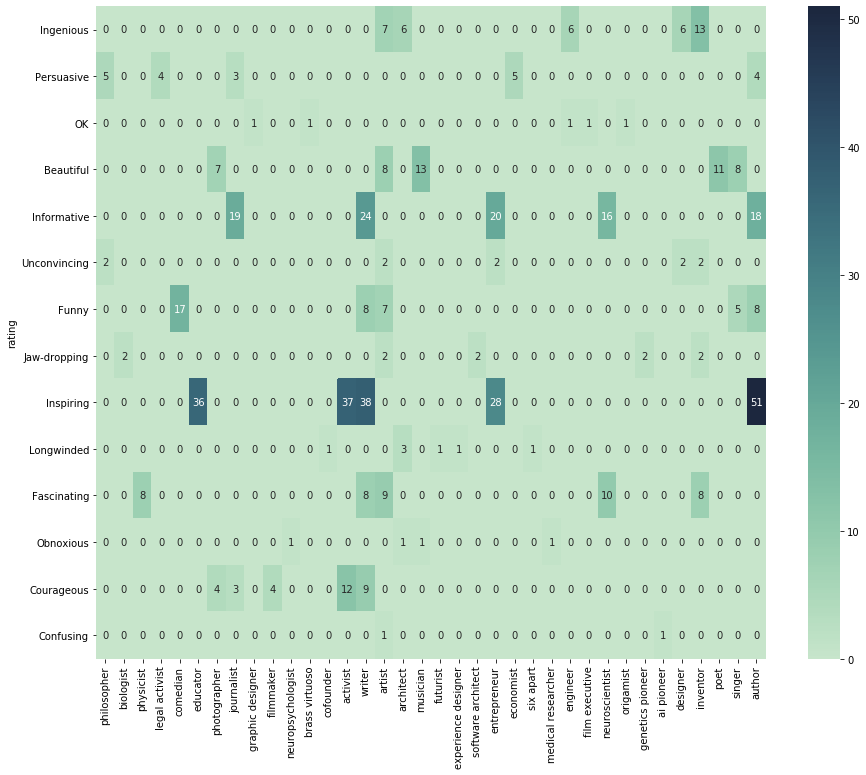

In [84]:
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
ax = sns.heatmap(rating_main_occup, annot = True, fmt = "d", cmap = cmap)

In [85]:
occupation_data['speaker_occupation'].value_counts().head(10)

writer          93
author          85
activist        66
artist          65
entrepreneur    59
designer        58
journalist      50
inventor        49
educator        49
architect       37
Name: speaker_occupation, dtype: int64

## From the heatmap we can easily say that the ratings are distributed and not concentrated. But some of the interesting observations are:
### Beautiful is associated generally to artists.
### Funny to comedians
### Courageous with activist and all are as we got in the tags analysis.

In [86]:
occupation_data['speaker_occupation'].value_counts().tail(20)

microbial ecologist                1
vision activist                    1
business strategist                1
video maker                        1
dolphin researcher                 1
clinical professor of law          1
cultural diplomacy expert          1
human resources professional       1
cultural historian                 1
transparency international         1
internet entrepreneur              1
broadcast personality              1
experimental particle physicist    1
literary critic                    1
imaging scientist                  1
gardener                           1
pediatric psychologist             1
cybersecurity specialist           1
nasa astronaut                     1
high seas policy advisor           1
Name: speaker_occupation, dtype: int64

### Some other findings maybe that we can look at the category of speaker occupation which is least called on TED talks and maybe provide a representation to them.
### We can also see that the number of negative ratings for the TED talks are generally less which is a good sign.
### Since duration and language have negative correlation there might be a need for some time limit that needs to be put for a talk on certain topic.
### Also since there are alot number of translation happening and the more language means a wider audience but that is not the case here so they might want to promote the availability of TED Talks in multiple languages.
### One thing that I found interesting is that the informative, courageous and persuasive are in the bottom 5 of translation which I feel might need to change are these things need to be known by more people.
### The number of views and comments do reflect the rating.
### We were able to see from the heatmap that the talk theme influence the rating, but the talking theme is also influenced by the speakers occupation.



## This is just a fun project which has some of my bits but a lot of learning that I did on the internet and kaggle.

# References:
## https://www.kaggle.com/anandaribeiro/understanding-ted-talks-ratings/notebook
## https://stackoverflow.com/questions/20965046/cumulative-sum-and-percentage-on-column
## https://plotly.com/python/heatmaps/
## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html